# Zadanie 1

In [1]:
import numpy
import matplotlib.pyplot as plt

In [2]:
file_ex1 = numpy.loadtxt("d19z1.csv", delimiter=",", skiprows=1)
x, y = file_ex1.transpose()

### Pomocniczy wykres

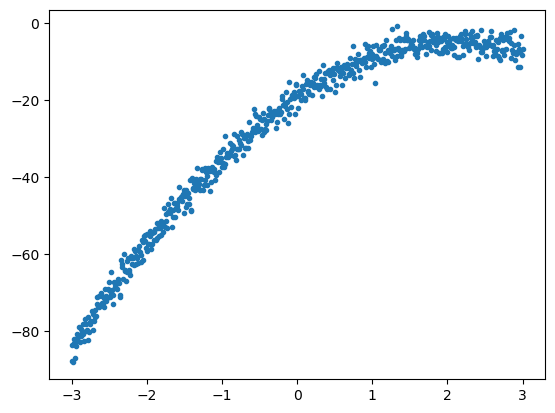

In [3]:
plt.plot(x, y, marker=".", lw=0)
plt.show()

Na wykresie zaburzona funkcja wygląda na fragment paraboli, czyli wielomianu stopnia 2.

### Znalezienie współczynników wielomianu za pomocą metody liniowego zadania najmniejszych kwadratów

In [4]:
Vandermonde_matrix = numpy.array([[x_i**j for j in range(2, -1, -1)] for x_i in x])
Vandermonde_matrix

array([[ 9.        , -3.        ,  1.        ],
       [ 8.94453018, -2.99074074,  1.        ],
       [ 8.88923182, -2.98148148,  1.        ],
       ...,
       [ 8.88923182,  2.98148148,  1.        ],
       [ 8.94453018,  2.99074074,  1.        ],
       [ 9.        ,  3.        ,  1.        ]])

In [5]:
polynomial_lstsq = numpy.linalg.lstsq(Vandermonde_matrix, y, rcond=0)[0]
polynomial_lstsq

array([ -2.97717563,  12.99528272, -19.1122642 ])

Metoda lznk zwróciła wielomian o współczynnikach
$$ y(x) = -2.97717563x^2 + 12.99528272x - 19.1122642$$
Współczynniki przy $x^2$ oraz $x$ nie są całkowite lecz ich wartości niewiele odbiegają od całkowitych więc może to być błąd spowodowany niedokładną artmetyką float. 


Natomiast wyraz wolny różni się od liczby całkowitej o więcej niż wynikałby to z niedokładności obliczeń zmiennoprzecinkowych więc to on mógłby być zerowy w oryginalnym wielomianie.
Po uwzględnieniu tych poprawek wzór wielomianu to:
$$ y(x) = -3x^2 + 13x $$

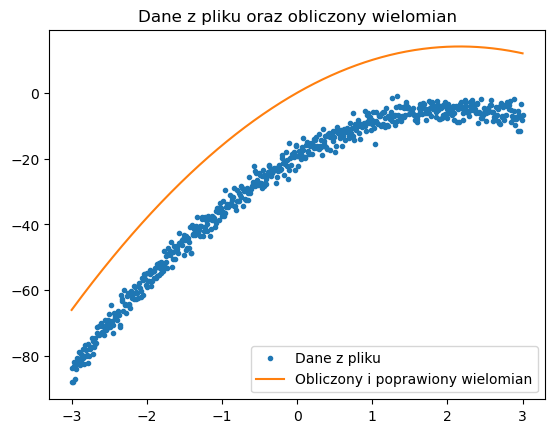

In [6]:
polynomial_func = lambda x: -3*x**2 + 13*x
plt.plot(x, y, marker=".", lw=0, label="Dane z pliku")
plt.plot(x, polynomial_func(x), label="Obliczony i poprawiony wielomian")
plt.title("Dane z pliku oraz obliczony wielomian")
plt.legend()
plt.show()

# Zadanie 2

### Wypisanie macierzy $A$ i wektora $f$

In [7]:
A = numpy.loadtxt("d19z2A.csv", delimiter=",")
A

array([[  98.,  -64.,  -77.,   34.,    1.,  -13.,  -91.,   -5.,    8.,
         -75.,   96.],
       [  68.,   -9.,    6.,   96.,  -66.,   62.,  -59.,   32.,    1.,
          50.,   -8.],
       [   5.,  -41.,  -30.,   75.,   65.,  -56.,   96.,   50.,   78.,
          73.,  -19.],
       [  31.,   25.,  -69.,   -5.,  -30.,   52.,  -74.,  -88.,   17.,
         -14.,    2.],
       [ -33.,  -15.,  -72.,  -18.,   53.,  -12.,   64.,   87.,   65.,
          77.,  -33.],
       [ -74.,  -63.,   75.,   59.,  -48.,   39.,   88.,   59.,  -51.,
          58.,  -36.],
       [ -62.,  -50.,  -41.,   14.,    3.,  -81.,   62.,   64.,  -80.,
          17.,  -41.],
       [  46.,   58.,  -97.,  -27.,  -27.,   11.,   98.,   -9.,  -25.,
         -81.,   34.],
       [  23.,  -15.,   86.,  -30.,    4.,    5.,  -88., -100.,    0.,
          42.,   46.],
       [  51.,   92.,   92.,   75.,   30.,   99.,   46., -100.,   77.,
         -30.,   63.],
       [  81.,   40.,  -65.,   32.,  -89.,   78.,   57.,   9

In [8]:
f = numpy.loadtxt("d19z2f.csv", delimiter=",")
f

array([-2542.,  3683., 13022., -6261., 11053.,  5878., -3555., -2023.,
       -1719., 10503., 12973.])

### Rozwiązanie równania $Ax = f$

In [9]:
x = numpy.linalg.solve(A, f)
x

array([ 1.,  7., 13., 19., 25., 31., 37., 43., 49., 55., 61.])

Jest to ciąg arytmetyczny o różnicy 6

# Zadanie 3

In [29]:
file_a = numpy.loadtxt("d19z3a.csv", delimiter=",", skiprows=1)
a = numpy.polynomial.Polynomial(file_a.transpose()[1])
a

Polynomial([ 1.87990378, -0.99118131, -8.52958584, -1.71102668,  4.83178508,
        0.56757004, -0.99518609,  0.01594778,  0.07212159, -0.00946044], domain=[-1,  1], window=[-1,  1], symbol='x')

In [30]:
file_b = numpy.loadtxt("d19z3b.csv", delimiter=",", skiprows=1)
b = numpy.polynomial.Polynomial(file_b.transpose()[1])
b

Polynomial([-8.37479295,  0.69314718], domain=[-1,  1], window=[-1,  1], symbol='x')

In [31]:
f = lambda x: a(x) + numpy.exp(b(x))

### Wykres funkcji na tym przedziale, aby móc oszacować ilość miejsc zerowych

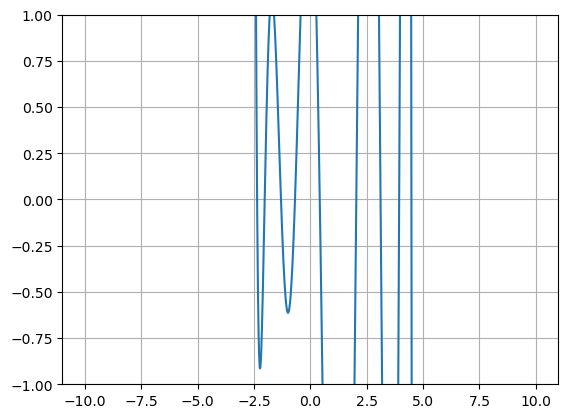

In [32]:
space = numpy.linspace(-10, 10, 2000)
plt.plot(space, f(space))
plt.ylim([-1, 1])
plt.grid()
plt.show()

Na tym przedziale funkcja ma **9** miejsc zerowych

Najpierw oszacuję je motodą bisekcji

In [14]:
import scipy.optimize
zeros_bisect = []
for i in numpy.arange(-10, 10, 0.1):
    try:
        zeros_bisect.append(scipy.optimize.bisect(f, i, i+0.25))
    except ValueError:
        continue

In [15]:
zeros_bisect

[-2.3613296625295597,
 -2.361329662528105,
 -2.361329662530288,
 -2.025166769836897,
 -2.02516676983908,
 -1.302784090587041,
 -1.302784090589224,
 -0.6807448368639921,
 -0.6807448368625373,
 -0.6807448368647204,
 0.41801988057446593,
 0.4180198805722828,
 0.4180198805737376,
 2.037503777470878,
 2.037503777472333,
 2.0375037774701497,
 3.1147982205114655,
 3.1147982205129203,
 3.114798220514375,
 3.9395689755666776,
 3.9395689755644945,
 3.9395689755659493,
 4.483623744715027,
 4.483623744716482]

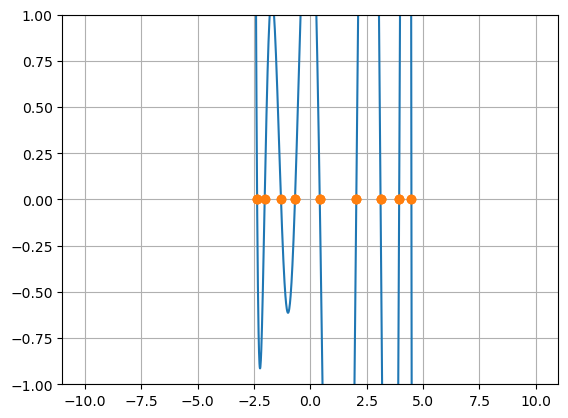

In [16]:
space = numpy.linspace(-10, 10, 2000)
zeros_bisect = numpy.array(zeros_bisect)
plt.plot(space, f(space))
plt.plot(zeros_bisect, f(zeros_bisect), marker="o", lw=0)
plt.grid()
plt.ylim([-1, 1])
plt.show()

Udało się znaleźć wszystkie miejsca zerowe, niektóre po pare razy z niewielkimi różnicami co do dokładnej wartości. Pozbędę się powtórzeń i doprecyzuję wynik metodą Newtona

In [17]:
zeros_bisect = list(set([round(i, 10) for i in zeros_bisect]))
zeros_bisect

[-0.6807448369,
 0.4180198806,
 2.0375037775,
 3.1147982205,
 3.9395689756,
 4.4836237447,
 -2.3613296625,
 -2.0251667698,
 -1.3027840906]

In [18]:
len(zeros_bisect)

9

In [19]:
f_deriv = lambda x: a.deriv()(x) + numpy.exp(b(x))*b.deriv()(x)
zeros_newton = [scipy.optimize.newton(f, i, fprime=f_deriv) for i in zeros_bisect]

### Znalezione miejsca zerowe z precyzją do 17 cyfr znaczących

In [20]:
for i in numpy.sort(zeros_newton):
    print(f"{i:.16f}")

-2.3613296625289730
-2.0251667698374103
-1.3027840905875052
-0.6807448368630966
0.4180198805731951
2.0375037774713665
3.1147982205130691
3.9395689755662029
4.4836237447161178


### Wykres funkcji z dokładnie zaznaczonymi miejscami zerowymi

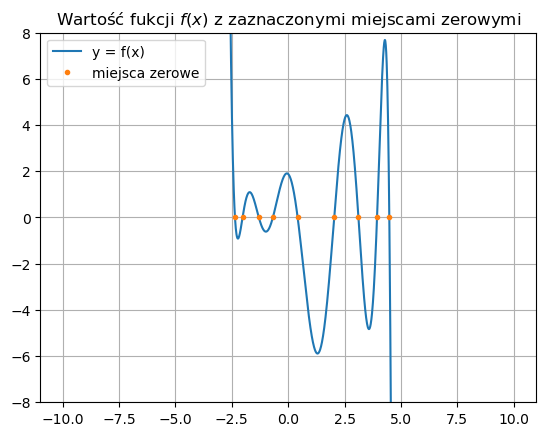

In [21]:
space = numpy.linspace(-10, 10, 2000)
zeros_newton = numpy.array(zeros_newton)
plt.plot(space, f(space), label="y = f(x)")
plt.plot(zeros_newton, f(zeros_newton), marker=".", lw=0, label="miejsca zerowe")
plt.legend()
plt.title("Wartość funkcji $f(x)$ z zaznaczonymi miejscami zerowymi")
plt.ylim([-8, 8])
plt.grid()
plt.show()

# Zadanie 4

In [22]:
import scipy.sparse

In [23]:
diag = numpy.loadtxt("d19z4diag.csv")
superdiag = numpy.loadtxt("d19z4naddiag.csv")
subdiag = numpy.loadtxt ("d19z4poddiag.csv")
B = scipy.sparse.diags([subdiag, diag, superdiag], [-1, 0, 1], format="csc")
B

<75849x75849 sparse matrix of type '<class 'numpy.float64'>'
	with 227545 stored elements in Compressed Sparse Column format>

In [24]:
f = numpy.loadtxt("d19z4f.csv")
f

array([ 69.15929101,  27.7052834 , -34.47060473, ...,   8.66154364,
        32.27216378, -21.55650599])

### Rozwiązanie równania $Bx = f$

In [25]:
x = scipy.sparse.linalg.spsolve(B, f)
x

array([-11.2143675 , -22.63118069, -29.08116867, ..., -28.77130465,
       -15.49817757, -19.0253015 ])

### Wykres z zaznaczonymi kolejnymi elementami wektora $x$

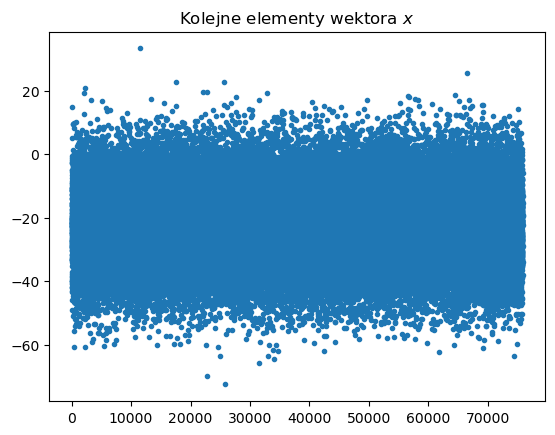

In [26]:
plt.plot(x, marker=".", lw=0)
plt.title("Kolejne elementy wektora $x$")
plt.show()

### Najlepiej ciąg $x$ opisuje poniższe stwierdzenie:
Jest to ciąg losowych liczb, w którym trudno znaleźć regularne wahania, czy też
stwierdzić że rośnie czy maleje.

Na żadnym z poniższych wykresów nie widać żeby w tym ciągu występowały jakieś prawdiłowości ponad to że są to losowe liczby z pewnego zakresu o nierównomiernym rozkładzie.

### Wykres mniejszego zakresu danych

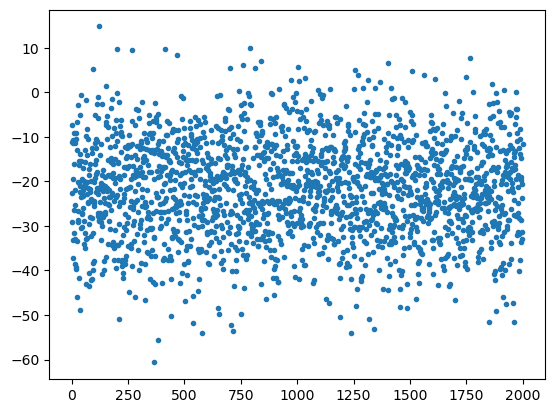

In [27]:
plt.plot(x[:2000], marker=".", lw=0)
plt.show()

### Histogram ilości wystąpień wartości

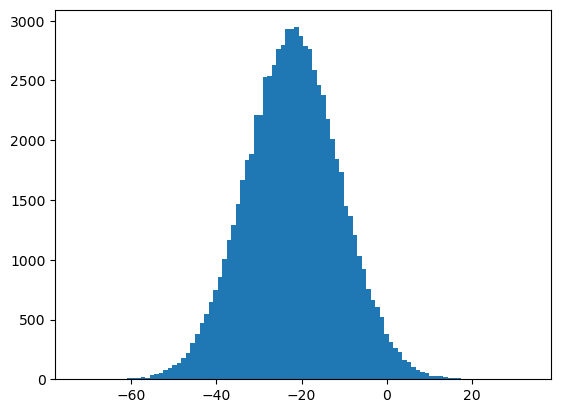

In [28]:
plt.hist(x, bins=100)
plt.show()